# Part A - 30 Marks

## DOMAIN: ***Electronics and Telecommunication

## CONTEXT: 
####                     A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

## DATA DESCRIPTION: *The data set contains information on various signal tests performed:
####   1:  Parameters: Various measurable signal parameters.
####   2:  Signal_Quality: Final signal strength or quality.

##  PROJECT OBJECTIVE:*To build a classifier which can use the given parameters to determine the signal strength or quality.

## 1. Data import and Understanding [10 Marks]:

#### A. Read the **Signals.csv** as DataFrame and import required libraries. [2 Marks]


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras

In [2]:
dataset = pd.read_csv("NN Project Data - Signal.csv")

#### B. Check for missing values and print percentage for each attribute. [2 Marks]

In [3]:
dataset.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dataset.shape

(1599, 12)

**The shape of the dataset matches the non-null count of each attribute: Therefore there are no missing values since even the datatype of each attribute is numeric, meaning there were no failed conversions of any of the attributes either

#### C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]
**I'm going to drop the duplicate records in this case(since there is no missing data in the dataset)

In [6]:
data = dataset.drop_duplicates()
data.shape

(1359, 12)

In [7]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


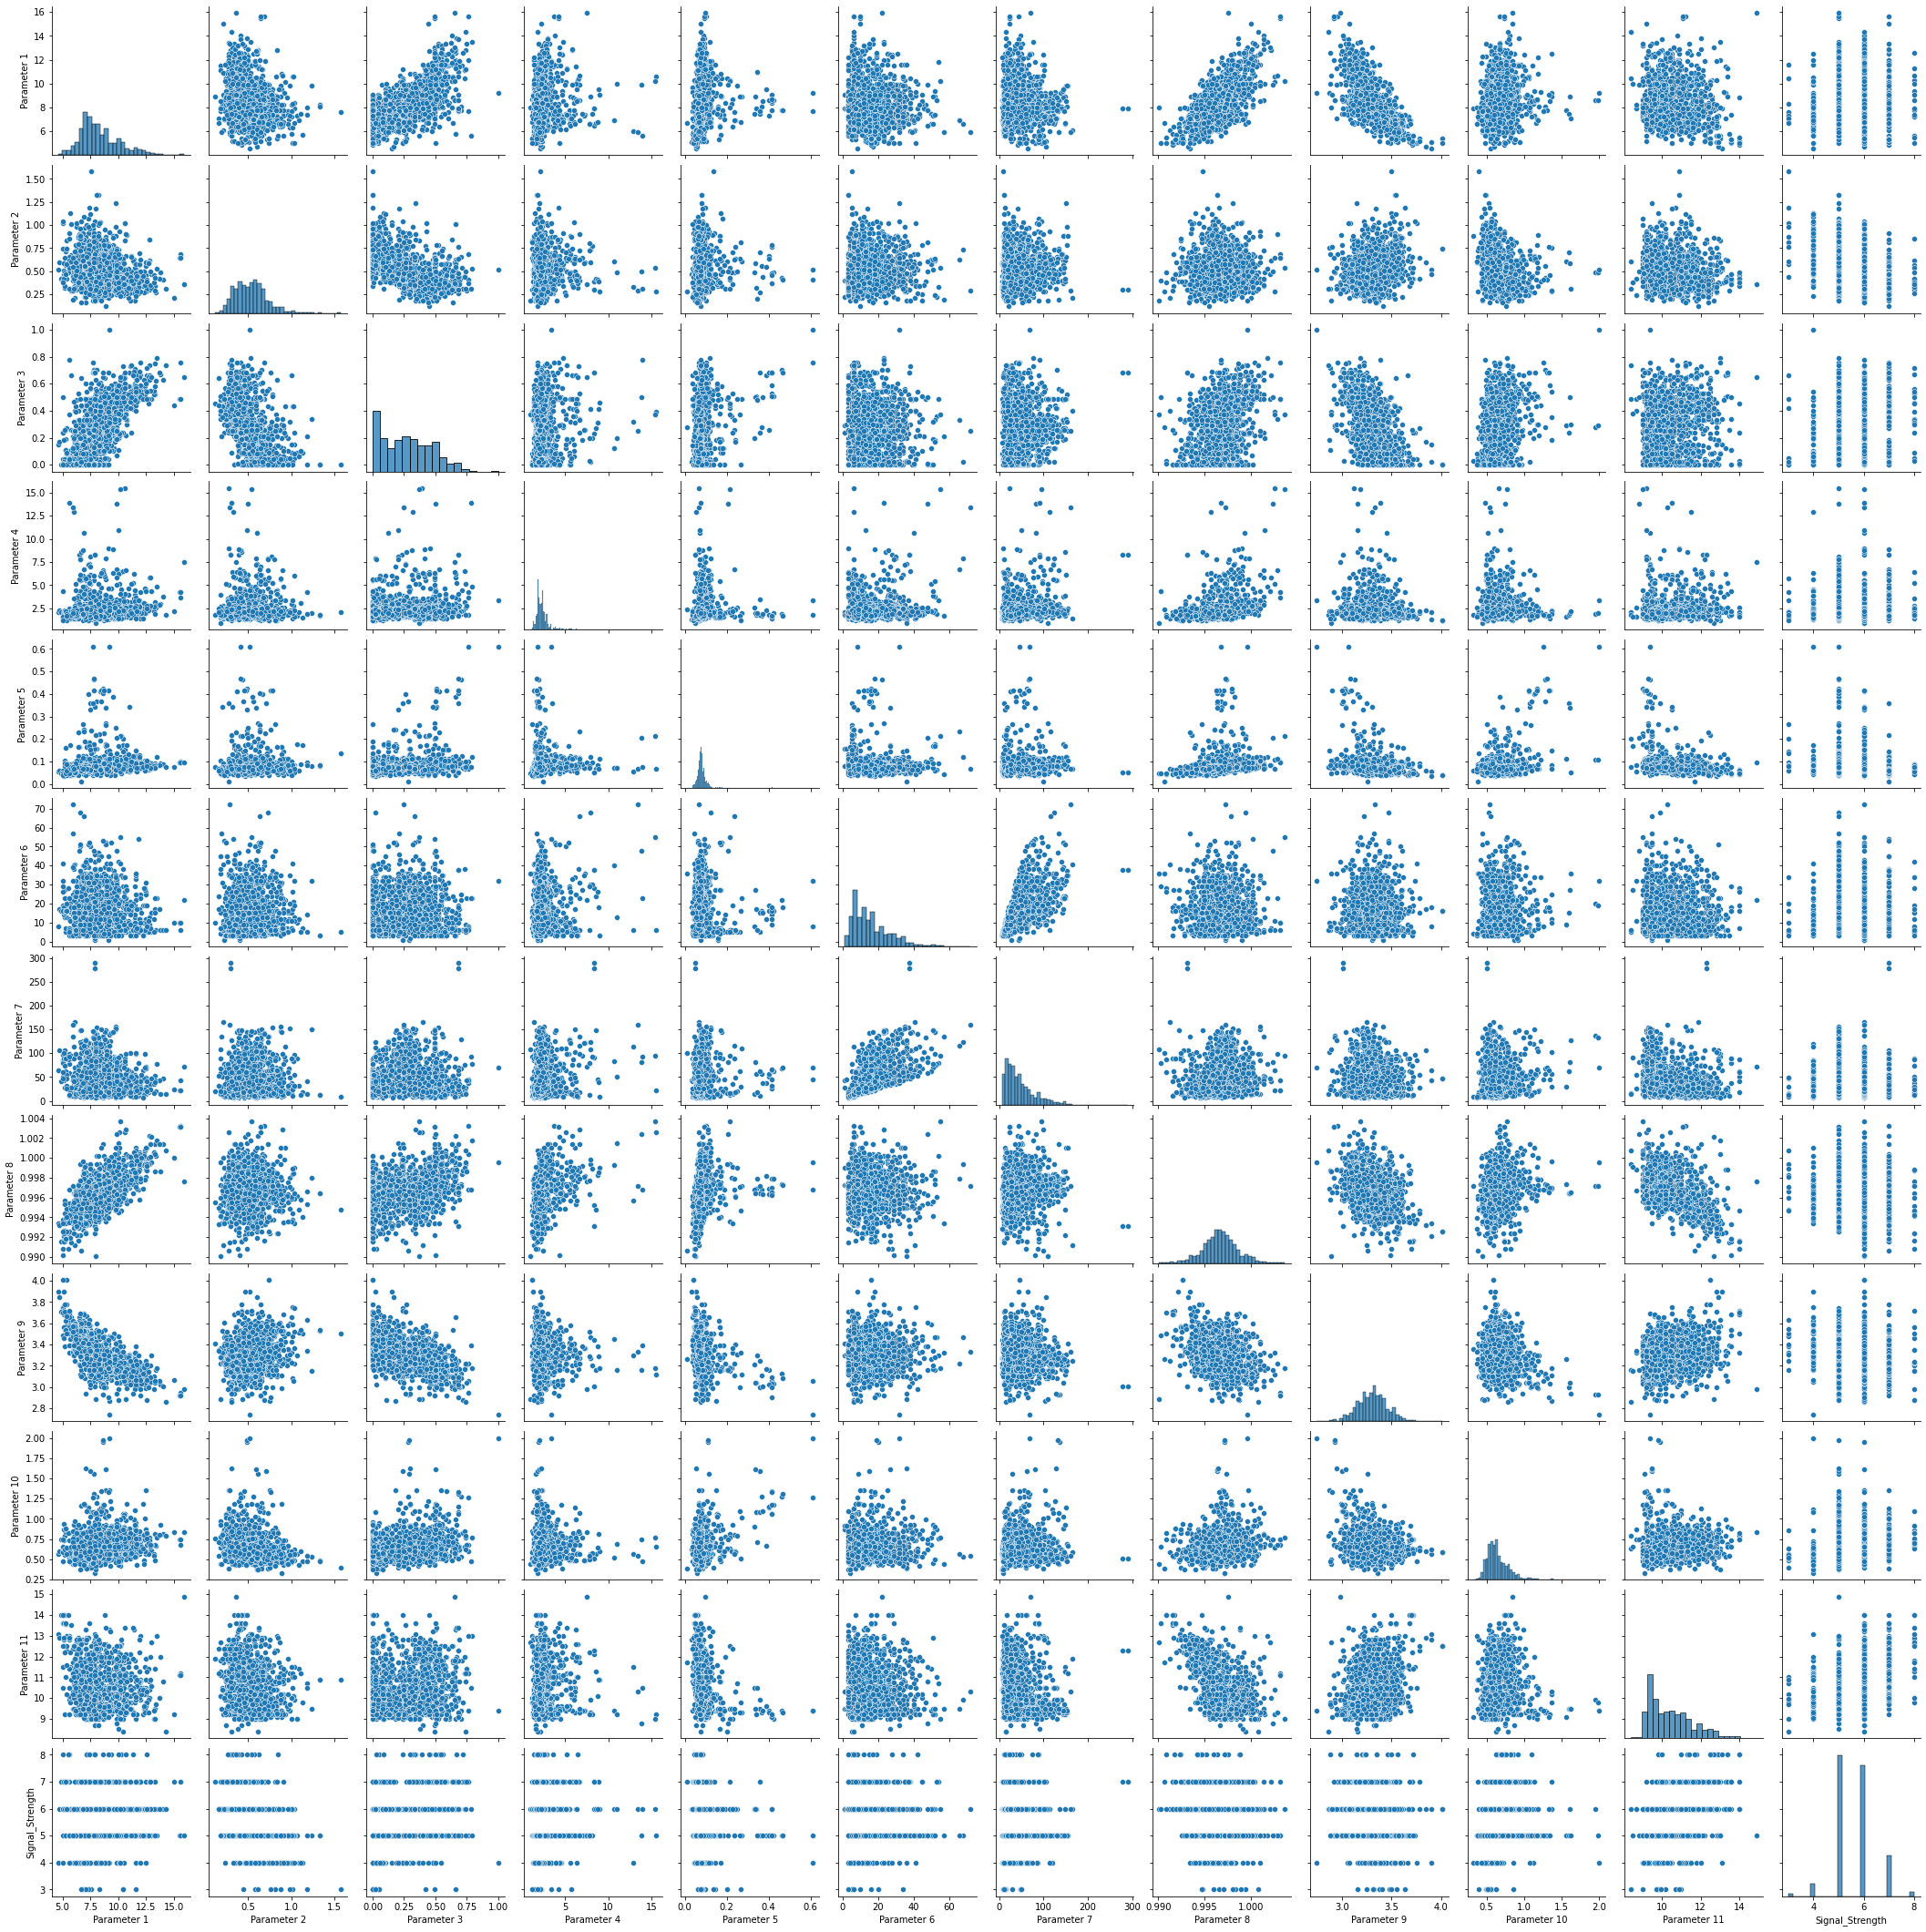

In [8]:
sns.pairplot(data)

<AxesSubplot:>

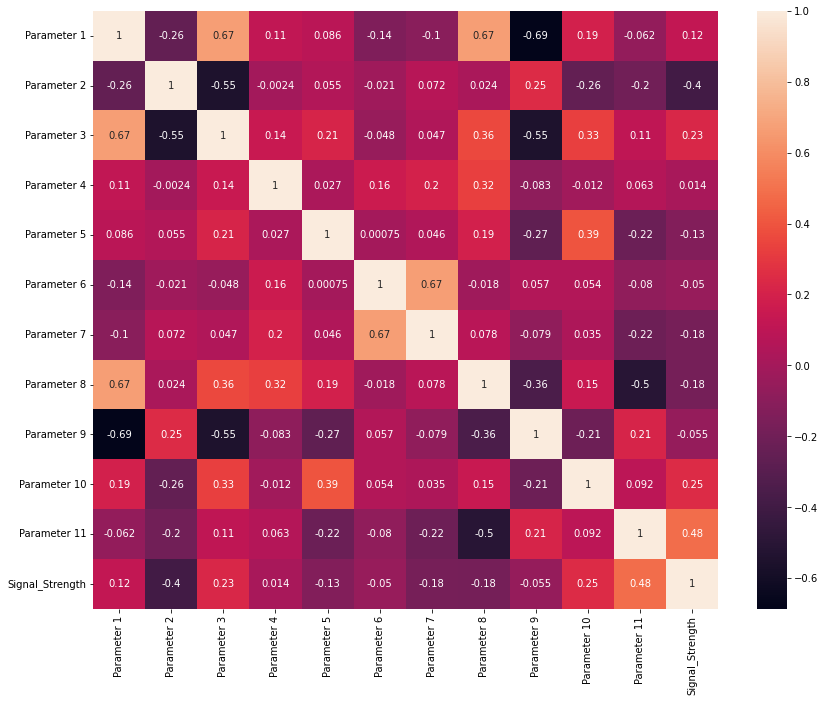

In [9]:
fig, axes = plt.subplots(figsize = (14, 11))

sns.heatmap(data.corr(), annot = True)

#### D. Visualise distribution of the target variable. [2 Marks]

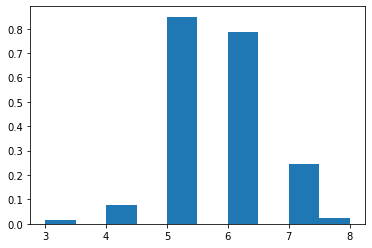

In [10]:
plt.hist(data["Signal_Strength"], density = True)
plt.show()

#### E. Share insights from the initial data analysis (at least 2). [2 Marks]

1 Most of the samples' Signal_Strength is 5 or 6, meaning there is class imbalance here

2 There appears to be very little skew in the distribution, meaning the data has come from just one source and isn't a       mix of multiple different sources

3 Most attributes that are atleast moderately correlated are negatively correlated, with exceptions like (parameter 1,       parameter 3), (parameter 1, parameter 8)

### 2. Data preprocessing [7 Marks]

#### A. Split the data into X & Y. [1 Marks]

In [11]:
print(data.columns)
X = data.drop("Signal_Strength", axis = 1)
Y = data["Signal_Strength"]

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')


In [12]:
X.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11'],
      dtype='object')

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Parameter 1   1359 non-null   float64
 1   Parameter 2   1359 non-null   float64
 2   Parameter 3   1359 non-null   float64
 3   Parameter 4   1359 non-null   float64
 4   Parameter 5   1359 non-null   float64
 5   Parameter 6   1359 non-null   float64
 6   Parameter 7   1359 non-null   float64
 7   Parameter 8   1359 non-null   float64
 8   Parameter 9   1359 non-null   float64
 9   Parameter 10  1359 non-null   float64
 10  Parameter 11  1359 non-null   float64
dtypes: float64(11)
memory usage: 159.7 KB


In [ ]:
Y.info()

#### B. Split the data into train & test with 70:30 proportion.[1 Marks]

In [15]:
training_data, testing_data, training_labels,  testing_labels = train_test_split(X, Y, test_size =  0.3)

#### C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

In [16]:
print(
    training_data.shape,
    testing_data.shape,
    training_labels.shape,
    testing_labels.shape
)

(951, 11) (408, 11) (951,) (408,)


In [17]:
class_dist_test = testing_labels.value_counts() / sum(testing_labels.value_counts())



In [18]:
class_dist_train = training_labels.value_counts() / sum(training_labels.value_counts())

In [19]:

abs(class_dist_train - class_dist_test)

3    0.003510
4    0.010817
5    0.070846
6    0.088900
7    0.024997
8    0.000363
Name: Signal_Strength, dtype: float64

The o/p distributions are completely in sync

In [20]:
training_data.describe() - testing_data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02,543.000000,543.000000,543.000000
mean,0.043512,-0.009275,0.020881,0.051301,0.003963,1.463935,4.313327,8.203107e-05,-0.003212,0.011144,-0.031343
std,0.091325,0.012050,0.002762,0.164110,0.012734,0.878642,0.736437,5.436897e-07,0.002341,0.020698,0.003324
min,-0.400000,-0.040000,0.000000,-0.300000,-0.022000,-2.000000,0.000000,-1.430000e-03,-0.150000,0.040000,-0.300000
25%,0.000000,-0.010000,0.020000,0.000000,0.000000,1.000000,3.000000,0.000000e+00,0.010000,0.000000,0.000000
50%,0.000000,-0.040000,0.030000,0.000000,0.000000,1.000000,7.000000,3.000000e-05,0.000000,0.000000,0.000000
75%,0.200000,-0.005000,0.010000,0.000000,0.002000,3.000000,6.000000,3.000000e-04,0.000000,0.010000,-0.100000
max,0.400000,0.250000,0.210000,0.100000,0.196000,17.000000,-11.000000,-4.900000e-04,0.000000,0.050000,0.900000


Measures of central tendeencies of i/p data are also almost completely in sync

#### D. Normalise the train and test data with appropriate method. [2 Marks]

In [21]:
std_dev = training_data.std()

In [22]:
average = training_data.mean()

In [23]:
training_data -= average
training_data /= std_dev

In [24]:
#  I'm using the central tendencies of the training data to preprocess test data as well because I read that using the
# central tendencies of test data leaks information about the test data to the evaluation process.
testing_data -= average
testing_data /= std_dev

#### E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [25]:
train_labels = training_labels.to_numpy()
test_labels = testing_labels.to_numpy()

In [26]:
print(
    train_labels.shape,
    test_labels.shape
)

(951,) (408,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [29]:
train_labels = keras.utils.to_categorical(train_labels, num_classes = 9)
test_labels = keras.utils.to_categorical(test_labels, num_classes = 9)

In [30]:
print(
    train_labels.shape,
    test_labels.shape
)

(951, 9) (408, 9)


In [31]:
train_data = training_data.to_numpy()
test_data = testing_data.to_numpy()

print(
    train_data.shape,
    test_data.shape
)

(951, 11) (408, 11)


### 3. Model Training & Evaluation using Neural Network [12 Marks]

#### A. Design a Neural Network to train a classifier. [3 Marks]

In [32]:
inputs = keras.Input(shape = (11,))
#x = keras.layers.Dense(128, activation = "relu")(inputs)
#x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(64, activation = "relu")(inputs)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(32, activation = "relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(16, activation = "relu")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation = "softmax")(x)

model = keras.Model(inputs, outputs)

In [33]:
model.compile(
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
    optimizer = "rmsprop"
)

#### B. Train the classifier using previously designed Architecture [2 Marks]

In [34]:
history = model.fit(
    train_data,
    train_labels,
    validation_split = 0.2,
    epochs = 20,
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            monitor = "val_accuracy",
            save_best_only = True,
            filepath = "./model_1.keras"
        )
    ],
    batch_size = 64
)

Epoch 1/20
12/12 [==============================] - 6s 47ms/step - loss: 2.2581 - accuracy: 0.1539 - val_loss: 2.0409 - val_accuracy: 0.3665
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 2.0777 - accuracy: 0.2066 - val_loss: 1.9136 - val_accuracy: 0.4607
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 1.9565 - accuracy: 0.2895 - val_loss: 1.7962 - val_accuracy: 0.5183
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 1.8363 - accuracy: 0.3566 - val_loss: 1.6953 - val_accuracy: 0.5288
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 1.7853 - accuracy: 0.3842 - val_loss: 1.5985 - val_accuracy: 0.5183
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 1.7354 - accuracy: 0.3737 - val_loss: 1.5205 - val_accuracy: 0.5497
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 1.6232 - accuracy: 0.4118 - val_loss: 1.4442 - val_accuracy: 0.5288
Epoch 8/20
12/12 [=

#### C. Plot 2 separate visuals. [3 Marks]

Training Loss and Validation Loss

Training Accuracy and Validation Accuracy

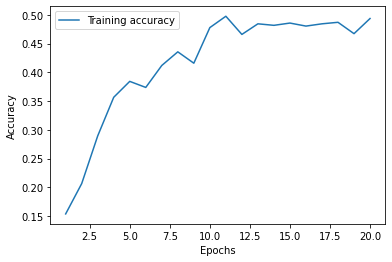

In [35]:
hist = history.history

plt.plot(range(1, len(hist["accuracy"]) + 1), hist["accuracy"], label = "Training accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

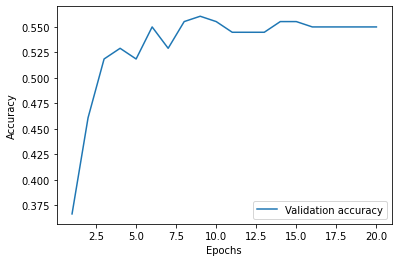

In [36]:
plt.plot(range(1, len(hist["val_accuracy"]) + 1), hist["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Showing both in 1 for convenience

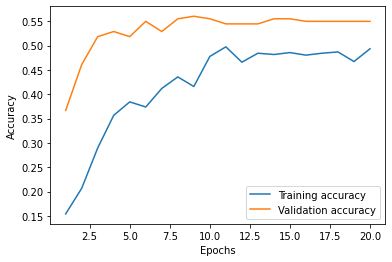

In [37]:
plt.plot(range(1, len(hist["accuracy"]) + 1), hist["accuracy"], label = "Training accuracy")
plt.plot(range(1, len(hist["val_accuracy"]) + 1), hist["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [38]:
orig_model = keras.models.load_model("./model_1.keras")
orig_model.evaluate(test_data, test_labels)

13/13 [==============================] - 0s 2ms/step - loss: 1.3041 - accuracy: 0.5637


[1.3040854930877686, 0.563725471496582]

#### D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]

In [39]:
inputs = keras.Input(shape = (11,))
#x = keras.layers.Dense(1024, activation = "relu")(inputs)
#x = keras.layers.Dropout(0.3)(x)
#x = keras.layers.Dense(512, activation = "relu")(x)
#x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(256, activation = "relu")(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(128, activation = "relu")(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(64, activation = "relu")(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(32, activation = "relu")(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(16, activation = "relu")(x)
x = keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(9, activation = "softmax")(x)

model_final = keras.Model(inputs, outputs)

In [40]:
model_final.compile(
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
    optimizer = keras.optimizers.RMSprop(learning_rate = 0.01)
)

In [41]:
history = model_final.fit(
    train_data,
    train_labels,
    validation_split = 0.2,
    epochs = 50,
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            monitor = "val_accuracy",
            save_best_only = True,
            filepath = "./signal.keras"
        )
    ],
    batch_size = 64
)

Epoch 1/50
12/12 [==============================] - 1s 25ms/step - loss: 1.6663 - accuracy: 0.4066 - val_loss: 1.1784 - val_accuracy: 0.5340
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 1.2951 - accuracy: 0.5145 - val_loss: 1.3140 - val_accuracy: 0.5288
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 1.2209 - accuracy: 0.5118 - val_loss: 1.2174 - val_accuracy: 0.5236
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 1.1521 - accuracy: 0.5395 - val_loss: 1.1563 - val_accuracy: 0.5393
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 1.0903 - accuracy: 0.5724 - val_loss: 1.1531 - val_accuracy: 0.5288
Epoch 6/50
12/12 [==============================] - 0s 9ms/step - loss: 1.0961 - accuracy: 0.5276 - val_loss: 1.1692 - val_accuracy: 0.5445
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 1.0376 - accuracy: 0.5645 - val_loss: 1.1153 - val_accuracy: 0.5812
Epoch 8/50
12/12 [

In [42]:
eval_model = keras.models.load_model("./signal.keras")
eval_model.evaluate(test_data, test_labels)

13/13 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.5539


[1.0966763496398926, 0.5539215803146362]

In [43]:
orig_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0     

In [44]:
eval_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_4 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0   

#### E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

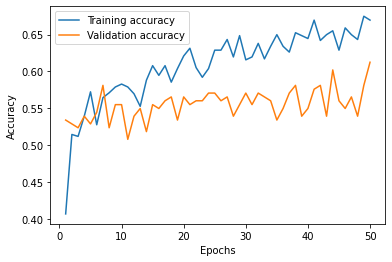

In [45]:
hist = history.history
plt.plot(range(1, len(hist["accuracy"]) + 1), hist["accuracy"], label = "Training accuracy")
plt.plot(range(1, len(hist["val_accuracy"]) + 1), hist["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

No significant difference between the 2 plots though

# Part B - 30 Marks
## DOMAIN: *Autonomous Vehicles
## CONTEXT:
####                        A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
#### The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.

#### While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.

#### The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.
## DATA DESCRIPTION:
####                                           The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a signi icantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
#### Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
#### Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with UnsupervisedFeature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site.

## PROJECT OBJECTIVE: *To build a digit classifier on the SVHN (Street View Housing Number) dataset.

### 1. Data Import and Exploration [5 Marks]

#### A. Read the .h5 file and assign to a variable. [2 Marks]



In [46]:
import h5py
DATA = h5py.File("./Autonomous_Vehicles_SVHN_single_grey1.h5", "r+")

#### B. Print all the keys from the .h5 file. [1 Marks]

In [47]:
list(DATA.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

(There are a lot because I failed to learn how to reshape data in a Dataset object properly...)

#### C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [48]:
X_train = DATA["X_train"]
X_test = DATA["X_test"]
X_val = DATA["X_val"]
y_train = DATA["y_train"]
y_test = DATA["y_test"]
y_val = DATA["y_val"]

### 2. Data Visualisation and preprocessing [13 Marks]

#### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

In [49]:
print(
    X_train.shape,
    X_test.shape,
    X_val.shape,
    y_train.shape,
    y_test.shape,
    y_val.shape
)

(42000, 32, 32) (18000, 32, 32) (60000, 32, 32) (42000,) (18000,) (60000,)


#### B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

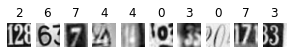

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize = (5, 5))
imgs = X_train[0 : 10]

for i, img in enumerate(imgs):
    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap = "gray")
    plt.title(str(y_train[i]))
    plt.axis('off')

#### C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

In [51]:
#DATA.create_dataset("X_train_final", data = DATA["X_train"], shape = (42_000, 32 * 32), dtype = "i8")

DATA.create_dataset("X_train_final__", data = DATA["X_train"], shape = (42_000, 32 * 32))#, dtype = "i8")
DATA.create_dataset("X_test_final__", data = DATA["X_test"], shape = (18_000, 32 * 32))#, dtype = "i8")
DATA.create_dataset("X_val_final__", data = DATA["X_val"], shape = (60_000, 32 * 32))#,dtype = "i8")

<HDF5 dataset "X_val_final__": shape (60000, 1024), type "<f4">

In [52]:
print(
    DATA["X_train_final__"].shape,
    DATA["X_test_final__"].shape,
    DATA["X_val_final__"].shape
)

(42000, 1024) (18000, 1024) (60000, 1024)


#### D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

In [53]:
avg = DATA["X_train_final__"][:].mean()
std_ = DATA["X_train_final__"][:].std()

In [60]:
X_train_final = DATA["X_train_final__"][:].astype("float16")
X_test_final = DATA["X_test_final__"][:].astype("float16")
X_val_final = DATA["X_val_final__"][:].astype("float16")

In [61]:
X_train_final -= avg
X_train_final /= std_

X_test_final -= avg
X_test_final /= std_

X_val_final -= avg
X_val_final /= std_

In [62]:
X_train_final = X_train_final.astype("int8")
X_test_final = X_test_final.astype("int8")
X_val_final = X_val_final.astype("int8")

In [63]:
X_train_final.dtype

dtype('int8')

#### E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [74]:
import tensorflow as tf
from tensorflow import keras
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

IndexError: list index out of range

In [65]:
y_train_final = keras.utils.to_categorical(DATA["y_train"], num_classes = 10)
y_test_final = keras.utils.to_categorical(DATA["y_test"], num_classes = 10)
y_val_final = keras.utils.to_categorical(DATA["y_val"], num_classes = 10)

In [66]:
print(
    y_train_final.shape,
    y_test_final.shape,
    y_val_final.shape
)

(42000, 10) (18000, 10) (60000, 10)


In [67]:
import numpy as np
len(np.unique(y_test))

10

### 3. Model Training & Evaluation using Neural Network [12 Marks]

#### A. Design a Neural Network to train a classifier. [3 Marks]

In [68]:
from tensorflow.keras import layers
from tensorflow.keras import callbacks

inputs__ = keras.Input(shape = (1024,))

features = layers.Dense(512, activation = "relu")(inputs__)
features = layers.BatchNormalization()(features)
features = layers.Dense(256, activation = "relu")(features)
features = layers.BatchNormalization()(features)
features = layers.Dense(128, activation = "relu")(features)
features = layers.BatchNormalization()(features)
features = layers.Dense(64, activation = "relu")(features)
features = layers.BatchNormalization()(features)
features = layers.Dense(32, activation = "relu")(features)
features = layers.BatchNormalization()(features)
features = layers.Dense(16, activation = "relu")(features)
outputs = layers.Dense(10, activation = "softmax")(features)

model__ = keras.Model(inputs__, outputs)

In [69]:
model__.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate = 0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

#### B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

In [70]:
hist__ = model__.fit(
    X_train_final,
    y_train_final,
    validation_data = (X_val_final, y_val_final),
    batch_size = 64,
    epochs = 100,
    callbacks = [
        callbacks.ModelCheckpoint(
            filepath = "./svhn_backup.keras",
            save_best_only = True,
            monitor = "val_loss"
        )
    ]
)

Epoch 1/100
657/657 [==============================] - 11s 13ms/step - loss: 1.8356 - accuracy: 0.3510 - val_loss: 1.4985 - val_accuracy: 0.4949
Epoch 2/100
657/657 [==============================] - 9s 14ms/step - loss: 1.4282 - accuracy: 0.5178 - val_loss: 1.3396 - val_accuracy: 0.5467
Epoch 3/100
657/657 [==============================] - 8s 13ms/step - loss: 1.2797 - accuracy: 0.5697 - val_loss: 1.1697 - val_accuracy: 0.6082
Epoch 4/100
657/657 [==============================] - 8s 13ms/step - loss: 1.1852 - accuracy: 0.5995 - val_loss: 1.1072 - val_accuracy: 0.6275
Epoch 5/100
657/657 [==============================] - 9s 13ms/step - loss: 1.1106 - accuracy: 0.6259 - val_loss: 1.0900 - val_accuracy: 0.6320
Epoch 6/100
657/657 [==============================] - 10s 16ms/step - loss: 1.0446 - accuracy: 0.6474 - val_loss: 1.0001 - val_accuracy: 0.6643
Epoch 7/100
657/657 [==============================] - 9s 13ms/step - loss: 0.9948 - accuracy: 0.6621 - val_loss: 0.9658 - val_accurac

#### C. Evaluate performance of the model with appropriate metrics. [2 Marks]                                                   

In [71]:
model__ = keras.models.load_model("./svhn_backup.keras")
model__.evaluate(X_test_final, y_test_final)

563/563 [==============================] - 2s 3ms/step - loss: 1.5121 - accuracy: 0.6264


[1.5121426582336426, 0.6264444589614868]

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax( model__.predict(X_test_final), axis = 1)))

              precision    recall  f1-score   support

           0       0.42      0.74      0.53      1814
           1       0.66      0.64      0.65      1828
           2       0.68      0.66      0.67      1803
           3       0.59      0.61      0.60      1719
           4       0.77      0.64      0.70      1812
           5       0.64      0.56      0.60      1768
           6       0.67      0.58      0.62      1832
           7       0.76      0.66      0.71      1808
           8       0.63      0.58      0.60      1812
           9       0.65      0.61      0.63      1804

    accuracy                           0.63     18000
   macro avg       0.65      0.63      0.63     18000
weighted avg       0.65      0.63      0.63     18000



#### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]

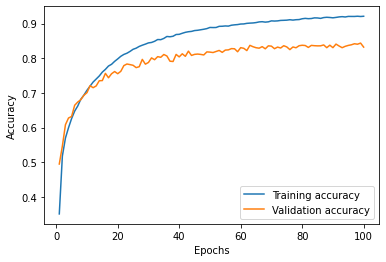

In [73]:
HISTORY = hist__.history
plt.plot(range(1, len(HISTORY["accuracy"]) + 1), HISTORY["accuracy"], label = "Training accuracy")
plt.plot(range(1, len(HISTORY["val_accuracy"]) + 1), HISTORY["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()